#### Question 2

First of all, I took the Global Temperature data set and created my data set with x y columns. then I plotted a curve with this data using linear least squares regression. I also drew a table accordingly. According to my data, I also created a data set containing my predictions for 5 years.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt('climate.txt')
df = pd.DataFrame(data, columns=['Date', 'a', 'Temperature'])

# Drop the 'Column1' column
df = df.drop('a', axis=1)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%Y')
df.head()

,Date,Temperature
0,1880-01-01,-0.10
1,1881-01-01,-0.13
2,1882-01-01,-0.17
3,1883-01-01,-0.21
4,1884-01-01,-0.24


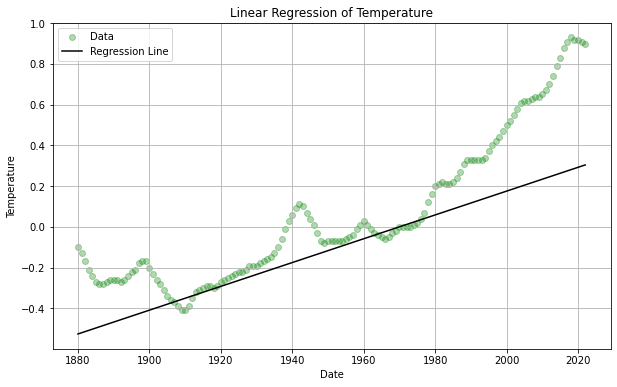

Next five consecutive dates and predicted temperatures:


,Date,Predicted Temperature
0,2022-12-31 00:00:00.000000001,0.309883
1,2023-12-31 00:00:00.000000001,0.315726
2,2024-12-31 00:00:00.000000001,0.321586
3,2025-12-31 00:00:00.000000001,0.327429
4,2026-12-31 00:00:00.000000001,0.333272


In [2]:
dates = df['Date'].values.astype('datetime64')
temperature = df['Temperature'].values

# Perform linear least squares regression
A = np.vstack([dates.astype(np.int64), np.ones(len(dates))]).T
m, c = np.linalg.lstsq(A, temperature, rcond=None)[0]

# Plot the data and regression line
plt.figure(figsize=(10, 6))  
plt.scatter(dates, temperature, label='Data', color='green', alpha=0.3)  
plt.plot(dates, m * dates.astype(np.int64) + c, 'black', label='Regression Line')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.title('Linear Regression of Temperature')  
plt.show()

# Get the last date from the 'dates' array
last_date = dates[-1]

# Generate the next five consecutive dates
next_dates = pd.date_range(start=last_date + 1, periods=5, freq='Y')

# Calculate the predicted temperatures for the next five dates
predicted_temperature = m * next_dates.astype(np.int64) + c

# Create a new DataFrame with the next dates and predicted temperatures
prediction_df = pd.DataFrame({'Date': next_dates, 'Predicted Temperature': predicted_temperature})

print("Next five consecutive dates and predicted temperatures:")
prediction_df.head()

# 

#### Question 3

First of all, I wrote the ellipse function, and then I performed the operations requested from me in the question. (splitting the dataset etc.) I got the result using nonlinear least squares regression and printed the values of the parameters. In general, according to my data set, x varied between 4-5 and y between 7-8. I also made sure that it was not the correct result by drawing the ellipse.



In [3]:
from scipy.optimize import least_squares

# Define function
def ellipse(params, x, y):
    
    h, k, alpha, beta = params
    return ((x - h) ** 2) / (alpha ** 2) + ((y - k) ** 2) / (beta ** 2) - 1

# Read the data from the file
data = np.loadtxt('data.txt')
x = data[:, 0]
y = data[:, 1]

# Split the data into two halves
n = len(data) // 2
x1 = x[:n]
y1 = y[:n]
x2 = x[n:]
y2 = y[n:]

# Concatenate the two halves of the data to account for the same x values
x_combined = np.concatenate((x1, x2))
y_combined = np.concatenate((y1, y2))

# Initial parameter estimates
h0 = np.mean(x_combined)
k0 = np.mean(y_combined)
alpha0 = (np.max(x_combined) - np.min(x_combined)) / 2
beta0 = (np.max(y_combined) - np.min(y_combined)) / 2
params0 = [h0, k0, alpha0, beta0]

# Perform the nonlinear least squares regression
result = least_squares(ellipse, params0, args=(x_combined, y_combined))

# Extract the estimated parameters
h_est, k_est, alpha_est, beta_est = result.x

print("Estimated parameters:")
print("h:", h_est)
print("k:", k_est)
print("alpha:", alpha_est)
print("beta:", beta_est)

Estimated parameters:
h: 4.999022357155868
k: 8.018302713696587
alpha: 0.273721690176303
beta: 0.9687648439346397


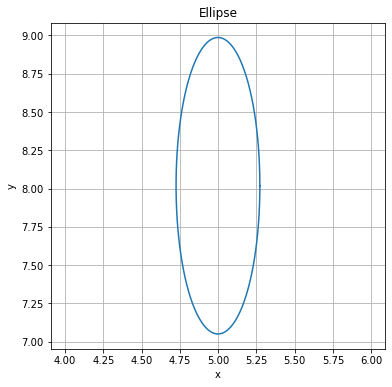

In [4]:
# Plot the ellipse to make sure

import matplotlib.pyplot as plt

def plot_ellipse(h, k, alpha, beta):
    
    theta = np.linspace(0, 2*np.pi, 100)
    x = h + alpha * np.cos(theta)
    y = k + beta * np.sin(theta)
    plt.figure(figsize=(6, 6))
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ellipse')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

h = 4.999022357155868
k = 8.018302713696587
alpha = 0.273721690176303
beta = 0.9687648439346397

# Plot the ellipse 
plot_ellipse(h, k, alpha, beta)



# 

#### Question 4

First of all, I printed the functions (sphere, etc.) in the question, then I wrote the naive function, and secondly, I chose to use particle swarm optimization. When I drew the functions in the question, I saw the minimum points. I tried to get these points using NRS and PSO for each function. Due to randomness, each time I run the code, * drifts a little, but I found the most optimal result with these parameters.

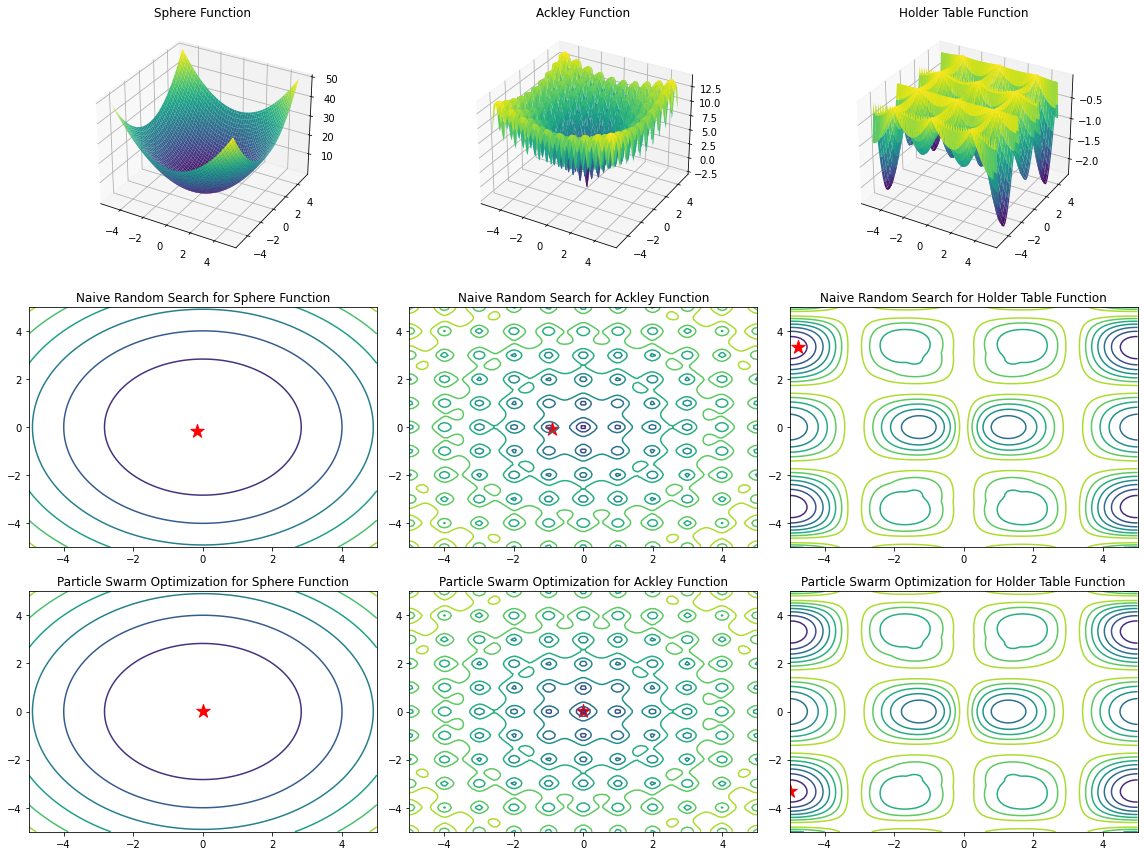

In [5]:
from mpl_toolkits.mplot3d import Axes3D


# Define functions
def sphere_function(x, y):
    
    return x**2 + y**2


def ackley_function(x, y, a, b, c):
    
    return -20 * np.exp(-a/10 * np.sqrt(b/10 * (x**2 + y**2))) - np.exp(c/10 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + np.e + 20


def holder_table_function(x, y):
    
    return -np.abs(np.sin(x) * np.cos(y) * np.exp(np.abs(1 - np.sqrt(x**2 + y**2) / np.pi)))


import numpy as np

def naive_random_search(function, bounds, num_iterations):
    
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []
    
    # Iterate num_iterations times and generate a random solution within the specified bounds
    for _ in range(num_iterations):
        
        solution = np.random.uniform(bounds[0], bounds[1], 2)  # Generate a random solution
        fitness = function(*solution)                          # Evaluate fitness of the solution
        fitness_history.append(fitness)                        # Store fitness in the history
        
        if fitness < best_fitness:                             # Check if current fitness is better than the best fitness so far
            best_fitness = fitness                             # Update the best fitness
            best_solution = solution                           # Update the best solution
    
    return best_solution, best_fitness, fitness_history


def particle_swarm_optimization(function, bounds, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight):
    
    dim = 2  # Dimensionality of the problem (assuming 2-dimensional particle positions)
    
    # Initialize particles, velocities, personal best positions, and personal best fitnesses
    particles = np.random.uniform(bounds[0], bounds[1], (num_particles, dim))  
    velocities = np.zeros((num_particles, dim))  
    pbest_positions = particles.copy() 
    pbest_fitness = np.array([function(*pos) for pos in particles]) 
    
    # Initialize global best position and fitness
    gbest_position = pbest_positions[np.argmin(pbest_fitness)] 
    gbest_fitness = np.min(pbest_fitness)  
    
    # Store the best fitness value at each iteration
    fitness_history = []  
    
    
    for _ in range(num_iterations):
        for i in range(num_particles):
            
            r1, r2 = np.random.rand(), np.random.rand()  # Random numbers 
            
            # Update velocities
            velocities[i] = (inertia_weight * velocities[i] +
                             cognitive_weight * r1 * (pbest_positions[i] - particles[i]) +
                             social_weight * r2 * (gbest_position - particles[i]))
            
            # Update particle positions
            particles[i] += velocities[i]
            
            # Ensure particles stay within the specified bounds
            particles[i] = np.clip(particles[i], bounds[0], bounds[1])
            
            # Evaluate fitness of the new particle position
            fitness = function(*particles[i])
            
            # Update personal best position and fitness 
            if fitness < pbest_fitness[i]:
                pbest_fitness[i] = fitness
                pbest_positions[i] = particles[i]
            
            # Update global best position and fitness 
            if fitness < gbest_fitness:
                gbest_fitness = fitness
                gbest_position = particles[i]
        
        fitness_history.append(gbest_fitness)  # Store the best fitness at each iteration
    
    return gbest_position, gbest_fitness, fitness_history


# Parameters (150200320 - 9 instead of 0)
a = 3
b = 2
c = 9

# For each func
bounds = (-5, 5)
num_iterations = 200

# Perform Naive Random Search for Sphere Function
naive_sphere_best_solution, naive_sphere_best_fitness, naive_sphere_fitness_history = naive_random_search(sphere_function, bounds, num_iterations)

# Perform Naive Random Search for Ackley Function
naive_ackley_best_solution, naive_ackley_best_fitness, naive_ackley_fitness_history = naive_random_search(lambda x, y: ackley_function(x, y, a, b, c), bounds, num_iterations)

# Perform Naive Random Search for Holder Table Function

naive_holder_best_solution, naive_holder_best_fitness, naive_holder_fitness_history = naive_random_search(holder_table_function, bounds, num_iterations)

# For PSO
num_particles = 29
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5

# Perform Particle Swarm Optimization for Sphere Function
pso_sphere_best_solution, pso_sphere_best_fitness, pso_sphere_fitness_history = particle_swarm_optimization(sphere_function, bounds, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight)

# Perform Particle Swarm Optimization for Ackley Function
pso_ackley_best_solution, pso_ackley_best_fitness, pso_ackley_fitness_history = particle_swarm_optimization(lambda x, y: ackley_function(x, y, a, b, c), bounds, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight)

# Perform Particle Swarm Optimization for Holder Table Function
pso_holder_best_solution, pso_holder_best_fitness, pso_holder_fitness_history = particle_swarm_optimization(holder_table_function, bounds, num_particles, num_iterations, inertia_weight, cognitive_weight, social_weight)


# Visualize the results 3D plot
x = np.linspace(bounds[0], bounds[1], 100)
y = np.linspace(bounds[0], bounds[1], 100)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(3, 3, 1, projection='3d')
ax1.plot_surface(X, Y, sphere_function(X, Y), cmap='viridis')
ax1.set_title("Sphere Function")

ax2 = fig.add_subplot(3, 3, 2, projection='3d')
ax2.plot_surface(X, Y, ackley_function(X, Y, a, b, c), cmap='viridis')
ax2.set_title("Ackley Function")

ax3 = fig.add_subplot(3, 3, 3, projection='3d')
ax3.plot_surface(X, Y, holder_table_function(X, Y), cmap='viridis')
ax3.set_title("Holder Table Function")

ax4 = fig.add_subplot(3, 3, 4)
ax4.contour(X, Y, sphere_function(X, Y), cmap='viridis')
ax4.scatter(naive_sphere_best_solution[0], naive_sphere_best_solution[1], color='r', marker='*', s=200)
ax4.set_title("Naive Random Search for Sphere Function")

ax5 = fig.add_subplot(3, 3, 5)
ax5.contour(X, Y, ackley_function(X, Y, a, b, c), cmap='viridis')
ax5.scatter(naive_ackley_best_solution[0], naive_ackley_best_solution[1], color='r', marker='*', s=200)
ax5.set_title("Naive Random Search for Ackley Function")

ax6 = fig.add_subplot(3, 3, 6)
ax6.contour(X, Y, holder_table_function(X, Y), cmap='viridis')
ax6.scatter(naive_holder_best_solution[0], naive_holder_best_solution[1], color='r', marker='*', s=200)
ax6.set_title("Naive Random Search for Holder Table Function")

ax4 = fig.add_subplot(3, 3, 7)
ax4.contour(X, Y, sphere_function(X, Y), cmap='viridis')
ax4.scatter(pso_sphere_best_solution[0], pso_sphere_best_solution[1], color='r', marker='*', s=200)
ax4.set_title("Particle Swarm Optimization for Sphere Function")

ax7 = fig.add_subplot(3, 3, 8)
ax7.contour(X, Y, ackley_function(X, Y, a, b, c), cmap='viridis')
ax7.scatter(pso_ackley_best_solution[0], pso_ackley_best_solution[1], color='r', marker='*', s=200)
ax7.set_title("Particle Swarm Optimization for Ackley Function")

ax8 = fig.add_subplot(3, 3, 9)
ax8.contour(X, Y, holder_table_function(X, Y), cmap='viridis')
ax8.scatter(pso_holder_best_solution[0], pso_holder_best_solution[1], color='r', marker='*', s=200)
ax8.set_title("Particle Swarm Optimization for Holder Table Function")

plt.tight_layout()
plt.show()